In [1]:
import os

output_dir = './output'
file_list = os.listdir(output_dir)

# file_list

In [2]:
import glob

csv_files = glob.glob('./output/*.csv')
count = len(csv_files)
count

152

In [3]:
import pandas as pd
import os

ids = [os.path.splitext(os.path.basename(file))[0].replace("_params", '') for file in csv_files]

df = pd.DataFrame({'uid': ids})

df['params_path'] = './output/' + df['uid'] + '_params.csv'
df['QBER_path'] = './output/' + df['uid'] + '_QBER.png'
df['rewards_path'] = './output/' + df['uid'] + '_rewards.png'

for index, row in df.iterrows():
    if not os.path.exists(row['QBER_path']):
        row['QBER_path'] = './output/' + row['uid'] + '_QBERS.png'
        df.at[index, 'QBER_path'] = row['QBER_path']


In [4]:
import csv

for index, row in df.iterrows():
    file_path = row['params_path']
    with open(file_path, 'r') as file:
        csv_reader = csv.reader(file)
        header = next(csv_reader)  # skip the header row
        for data_row in csv_reader:
            col_name = data_row[0]
            val = data_row[1]
            df.at[index, col_name] = val
            # df.at[index, column] = data_row[0]  # Append data

# df.drop('uid', axis=1, inplace=True)
# df.describe()
# df.columns

In [5]:
df = df.sort_values('date_completed')

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display as ipy_display, Markdown
import os

def plot_image(qber_path: str, reward_path: str):
    
    print(qber_path)
    print(reward_path)
    
    qber = mpimg.imread(qber_path)
    r = mpimg.imread(reward_path)
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    ax[0].imshow(qber)
    ax[0].axis('off')
    ax[0].set_title('QBER')
    ax[1].imshow(r)
    ax[1].axis('off')
    ax[1].set_title('Rewards')
    
    plt.axis('off')  # Hide axes
    plt.show()

def display(id: int):  
    row = df.iloc[[id]]
    
    ipy_display(Markdown(f"### UID: {row['uid'].values[0]} | ID: {id} | Time: {row['date_completed'].values[0]}"))
    
    styled_row = row.style.set_table_attributes('style="width: auto; border-collapse: collapse; white-space: nowrap;"').set_properties(**{'text-align': 'left'})
    
    # styled_row.set_properties(subset=['QBER_path', 'rewards_path'], **{'text-align': 'center'}).format({'QBER_path': '<img src="{}" width="200px">', 'rewards_path': '<img src="{}" width="200px">'})
    
    plot_image(row['QBER_path'].values[0], row['rewards_path'].values[0])
    
    return styled_row

def display_uid(str_uid: str):
    row = df[df['uid'] == str_uid]
    
    if len(row) == 0:
        print(f"No data found for UID: {str_uid}")
        return
    
    id = row.index[0]
    
    ipy_display(Markdown(f"### UID: {row['uid'].values[0]} | ID: {id} | Time: {row['date_completed'].values[0]}"))
    
    styled_row = row.style.set_table_attributes('style="width: auto; border-collapse: collapse; white-space: nowrap;"').set_properties(**{'text-align': 'left'})
    
    # styled_row.set_properties(subset=['QBER_path', 'rewards_path'], **{'text-align': 'center'}).format({'QBER_path': '<img src="{}" width="200px">', 'rewards_path': '<img src="{}" width="200px">'})
    
    plot_image(row['QBER_path'].values[0], row['rewards_path'].values[0])
    
    return styled_row

### UID: ec0a1640-4fd7-47bf-a9d2-3dd776abd806 | ID: 135 | Time: nan

./output/ec0a1640-4fd7-47bf-a9d2-3dd776abd806_QBER.png
./output/ec0a1640-4fd7-47bf-a9d2-3dd776abd806_rewards.png


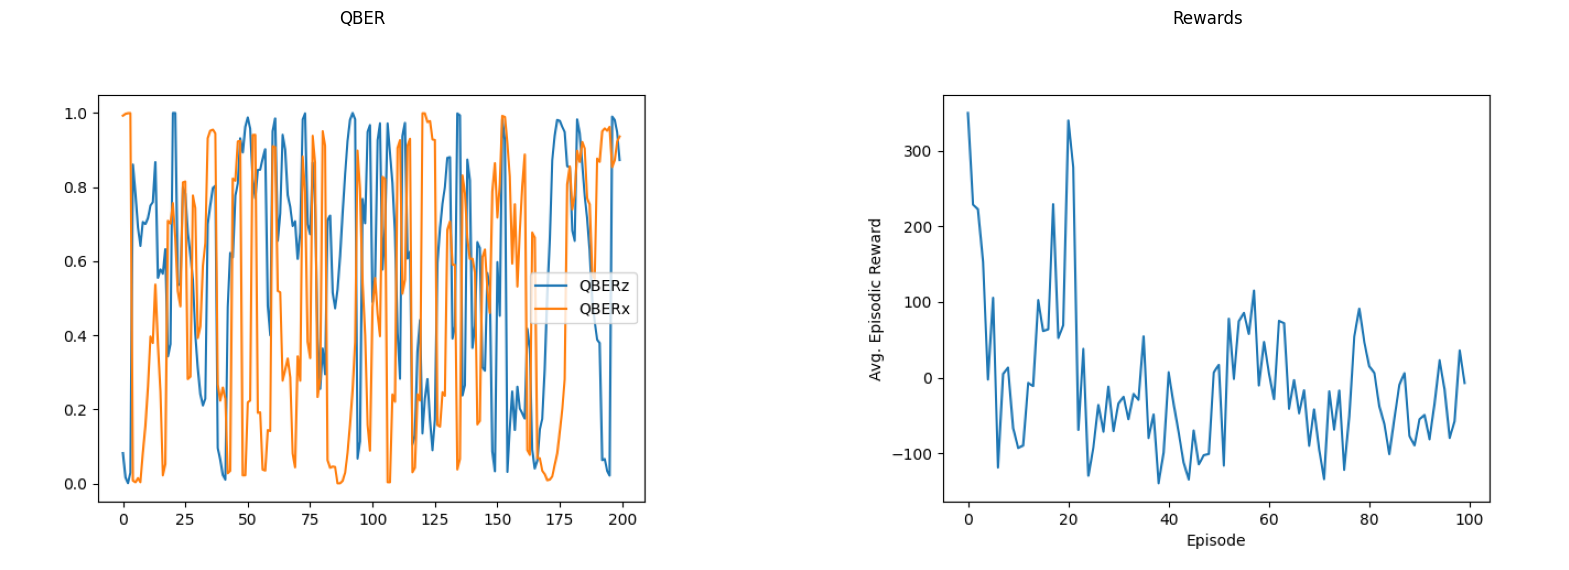

,uid,params_path,QBER_path,rewards_path,date_completed,total_episodes,gamma,tau,num_actions,num_states,lower_bound,upper_bound,ep_running_average,buffer_size,TARGET_REWARD,max_env_steps,latency,actor_lr,critic_lr,std_dev,env.delta_t,env.max_t,env_type,env.fixed_errors_flags,env.fixed_error_ctrl_pump,env.fixed_error_ctrl_alice,env.fixed_error_ctrl_bob,total_training_time,avg_time_per_ep,baseline_reward,note,algorithm,lambda,HIDDEN_LAYER_SIZES,target_kl,train_policy_iterations,train_value_iterations,policy_learning_rate,value_function_learning_rate,clip_ration,convergence_reward,seed,env_reward_type
135,ec0a1640-4fd7-47bf-a9d2-3dd776abd806,./output/ec0a1640-4fd7-47bf-a9d2-3dd776abd806_params.csv,./output/ec0a1640-4fd7-47bf-a9d2-3dd776abd806_QBER.png,./output/ec0a1640-4fd7-47bf-a9d2-3dd776abd806_rewards.png,nan,100,0.99,0.005,2,2,-3.141592653589793,3.141592653589793,nan,nan,nan,nan,1,0.001,0.01,0.4,0.01,2,SimpleControlledFixedEnv,"[True, True, True, True, False, False, True, True, True, True, True, True]",nan,nan,nan,nan,nan,nan,2bonus_constnegative_newNN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [12]:
# display(151)
display_uid("ec0a1640-4fd7-47bf-a9d2-3dd776abd806")